# Exploratory Data Analysis

### Import all required packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
libdir = os.chdir(r'C:\Users\Nidhi\Desktop\Saransh\FraudDetection')

In [3]:
cols = range(1,12)
file = r'./data/interim/cleansed.csv'
df = pd.read_csv(file,nrows = 100000,usecols = cols)
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.shape

(100000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


<font color = 'blue'>Checking the number of distinct values for all features and the count of observations for different types of transactions and Fraud/Non-Fraud features

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,100000.0,8.499640e+00,1.825545e+00,1.00,8.0000,9.00,10.000,10.00
amount,100000.0,1.736022e+05,3.443003e+05,0.32,9963.5625,52745.52,211763.150,10000000.00
oldbalanceOrg,100000.0,8.777575e+05,2.673284e+06,0.00,0.0000,20061.50,190192.025,33797391.55
newbalanceOrig,100000.0,8.940619e+05,2.711318e+06,0.00,0.0000,0.00,214813.250,34008736.98
oldbalanceDest,100000.0,8.805048e+05,2.402267e+06,0.00,0.0000,20839.43,588272.375,34008736.98
newbalanceDest,100000.0,1.184041e+06,2.802350e+06,0.00,0.0000,49909.18,1058186.155,38946233.02
isFraud,100000.0,1.160000e-03,3.403918e-02,0.00,0.0000,0.00,0.000,1.00
isFlaggedFraud,100000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.00,0.000,0.00


## Categorical

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='Count'>

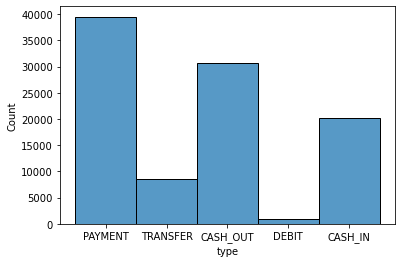

In [8]:
sns.histplot(data = df, x = 'type')

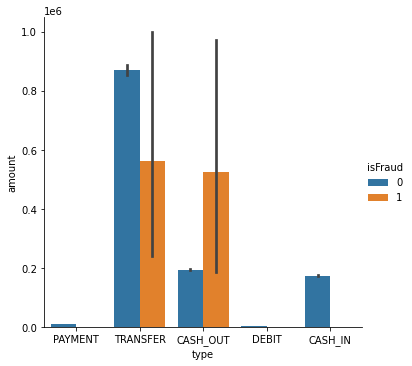

In [9]:
sns.catplot(data = df, x = 'type', y = 'amount', kind = 'bar',
           hue = 'isFraud')

<b>Inference</b>
- Payment type has the maximum number of transactions however most of amount is transacted under Transfer type which also has the maximum amount in Fraud transactions followed by Cash_Out  

In [10]:
df['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

In [11]:
percent_fraud = df[df['isFraud']==1]['isFraud'].sum()/len(df)
percent_fraud
print('Fraudulent transactions account for :',str(round(percent_fraud*100,2)),'%')

Fraudulent transactions account for : 0.12 %


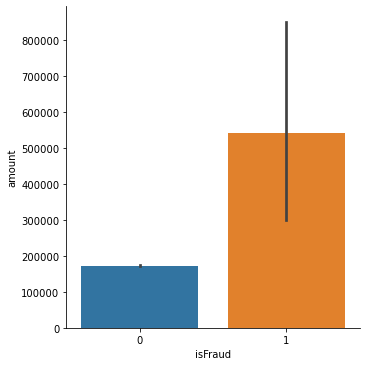

In [12]:
sns.catplot(data = df, x = 'isFraud',y = 'amount',kind = 'bar')

<b>Inference</b>
- Fraudulent transations account for .12% of the overall number of transactions
- Fraudulent transactions aggregate to more amount than non-fraudulent ones

In [13]:
df['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

## Univariate Analysis

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

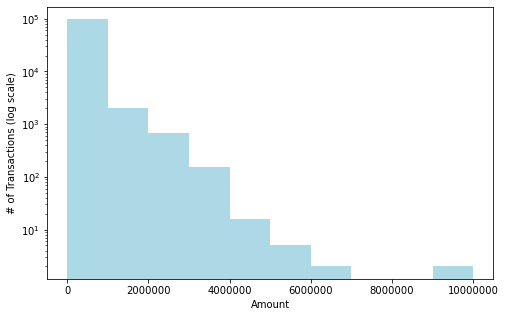

In [15]:
plt.figure(figsize = (8,5))
plt.ticklabel_format(style='plain')

plt.hist(df['amount'],bins = 10, log = True,color = 'lightblue')
plt.ylabel('# of Transactions (log scale)')
plt.xlabel('Amount')
plt.show()

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

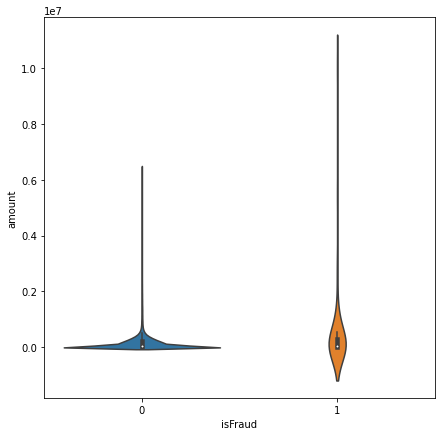

In [16]:
plt.figure(figsize = (7,7))
sns.violinplot( data = df, x = 'isFraud',y = 'amount')

In [18]:
#For univariate analysis of fraud transactions
fraud_only = df[df['isFraud']==1]

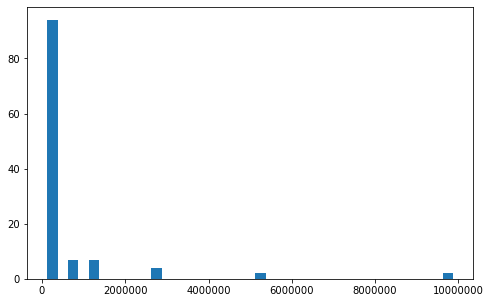

In [19]:
plt.figure(figsize = (8,5))
plt.ticklabel_format(style = 'plain')

plt.hist(fraud_only['amount'],bins = 20, rwidth = .5)
plt.show()

<b>Inference</b>
- Most of the transactions are of low amount
- Very few fraudulent transactions; with a high range of amount

## Bivariate Analysis

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<AxesSubplot:>

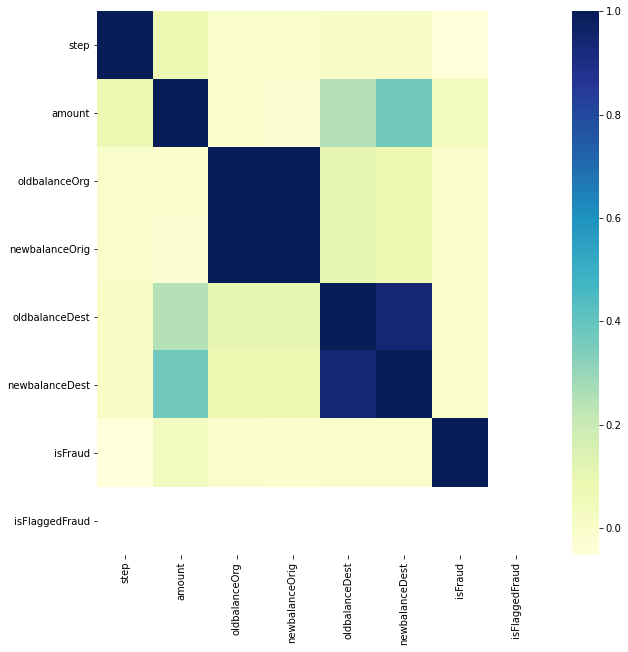

In [21]:
corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="YlGnBu")

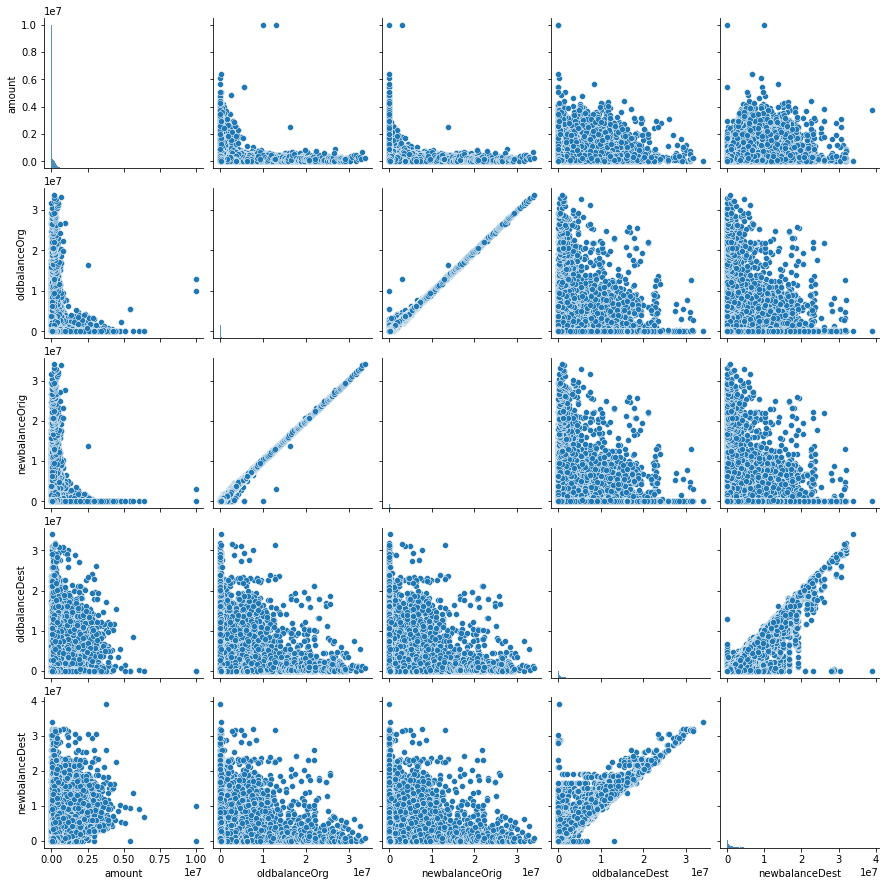

In [22]:
cols = ['amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
sns.pairplot(data = df[cols])

<b>Inference</b>

- Low correlation between amount and the balances of origin and destination